# IoT Room Climate

## 1. Load data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.1 Load entries from Room A

In [2]:
dfA = pd.DataFrame()

features = [
    'ID',
    'AbsTimestamp',
    'RelTimestamp',
    'NodeID',
    'Temperature',
    'Humidity',
    'WaveLength1',
    'WaveLength2',
    'Occupants',
    'Activity',
    'DoorState',
    'WindowState'
]

for i in range(1, 60):
    if(i <= 9):
        df_A_i = pd.read_csv("datasets-location_A/room_climate-location_A-measurement0" + str(i) + ".csv", names=features)
    else:
        df_A_i = pd.read_csv("datasets-location_A/room_climate-location_A-measurement" + str(i) + ".csv", names=features)
    
    frames = [dfA, df_A_i]
    dfA = pd.concat(frames)

### 1.2 Load entries from Room B

In [5]:
dfB = pd.DataFrame()

for i in range(1, 44):
    if(i <= 9):
        df_B_i = pd.read_csv("datasets-location_B/room_climate-location_B-measurement0" + str(i) + ".csv", names=features)
    else:
        df_B_i = pd.read_csv("datasets-location_B/room_climate-location_B-measurement" + str(i) + ".csv", names=features)
    
    frames = [dfB, df_B_i]
    dfB = pd.concat(frames)

### Load entries from Room C

In [7]:
dfC = pd.DataFrame()

for i in range(1, 40):
    if(i <= 9):
        df_C_i = pd.read_csv("datasets-location_C/room_climate-location_C-measurement0" + str(i) + ".csv", names=features)
    else:
        df_C_i = pd.read_csv("datasets-location_C/room_climate-location_C-measurement" + str(i) + ".csv", names=features)
    
    frames = [dfC, df_C_i]
    dfC = pd.concat(frames)

In [8]:
dfC['Occupants'].unique()

array([0, 1], dtype=int64)

In [9]:
dfA['Room'] = 'A'
dfB['Room'] = 'B'
dfC['Room'] = 'C'

frames = [dfA, dfB, dfC]
df = pd.concat(frames, ignore_index=True)

In [11]:
df['AbsTimestamp'] = pd.to_datetime(df['AbsTimestamp'], unit='ms')

In [12]:
df = df.sort_values(by='AbsTimestamp')

### Apply resampling on AbsTimestamp and aggregate the features.

In [55]:
aggregates = {
    'Temperature':'mean',
    'WaveLength1':'mean',
    'WaveLength2':'mean',
    'Humidity': 'mean',
    'Occupants':'mean',
    'Activity': 'mean',
    'DoorState': 'mean',
    'WindowState': 'mean'
}

# Split rooms into their own dataframe and resample
dfResampleA = df[df['Room'] == 'A'].resample('60S', on='AbsTimestamp').agg(aggregates)
dfResampleB = df[df['Room'] == 'B'].resample('60S', on='AbsTimestamp').agg(aggregates)
dfResampleC = df[df['Room'] == 'C'].resample('60S', on='AbsTimestamp').agg(aggregates)

In [56]:
dfNewA = dfResampleA.assign()
dfNewB = dfResampleB.assign()
dfNewC = dfResampleC.assign()

# Group by room
dfNewA['Room'] = 'A'
dfNewB['Room'] = 'B'
dfNewC['Room'] = 'C'

dfNewA = dfNewA.reset_index()
dfNewB = dfNewB.reset_index()
dfNewC = dfNewC.reset_index()

frames = [dfNewA, dfNewB, dfNewC]
dfNew = pd.concat(frames, ignore_index=True)

dfNew['Occupants'] = dfNew['Occupants'].apply(np.floor)
dfNew['Activity'] = dfNew['Activity'].apply(np.floor)
dfNew['DoorState'] = dfNew['DoorState'].apply(np.floor)
dfNew['WindowState'] = dfNew['WindowState'].apply(np.floor)

In [54]:
print(dfNew.count())
print(dfNew.isna().sum())

AbsTimestamp    83952
Temperature      9093
WaveLength1      9093
WaveLength2      9093
Humidity         9093
Occupants        9093
Activity         9093
DoorState        9093
WindowState      9093
Room            83952
dtype: int64
AbsTimestamp        0
Temperature     74859
WaveLength1     74859
WaveLength2     74859
Humidity        74859
Occupants       74859
Activity        74859
DoorState       74859
WindowState     74859
Room                0
dtype: int64


In [38]:
df_clean = dfNew
df_clean.dropna(subset=[
    'Temperature', 
    'WaveLength1', 
    'WaveLength2', 
    'Humidity', 
    'Occupants', 
    'Activity',
    'DoorState',
    'WindowState', 
    'Room'], inplace=True)

In [65]:
df_clean

,AbsTimestamp,Temperature,WaveLength1,WaveLength2,Humidity,Occupants,Room
0,2016-03-15 08:47:00,20.646875,192.276250,558.756250,40.428500,0.0,A
1,2016-03-15 08:48:00,20.647167,192.690000,560.433333,40.428500,0.0,A
2,2016-03-15 08:49:00,20.644500,192.571833,562.350000,40.429833,0.0,A
3,2016-03-15 08:50:00,20.640333,193.428000,566.413333,40.436500,0.0,A
4,2016-03-15 08:51:00,20.639000,193.975500,570.936667,40.449283,0.0,A
...,...,...,...,...,...,...,...
83947,2017-02-03 17:26:00,22.217200,156.512933,361.989333,47.556480,0.0,C
83948,2017-02-03 17:27:00,22.215067,156.475067,362.725333,47.527813,0.0,C
83949,2017-02-03 17:28:00,22.211600,156.284267,362.602667,47.534280,0.0,C
83950,2017-02-03 17:29:00,22.207600,156.246800,362.664000,47.499893,0.0,C


In [67]:
print(df_clean.count())
print(df_clean.isna().sum())

AbsTimestamp    9093
Temperature     9093
WaveLength1     9093
WaveLength2     9093
Humidity        9093
Occupants       9093
Room            9093
dtype: int64
AbsTimestamp    0
Temperature     0
WaveLength1     0
WaveLength2     0
Humidity        0
Occupants       0
Room            0
dtype: int64


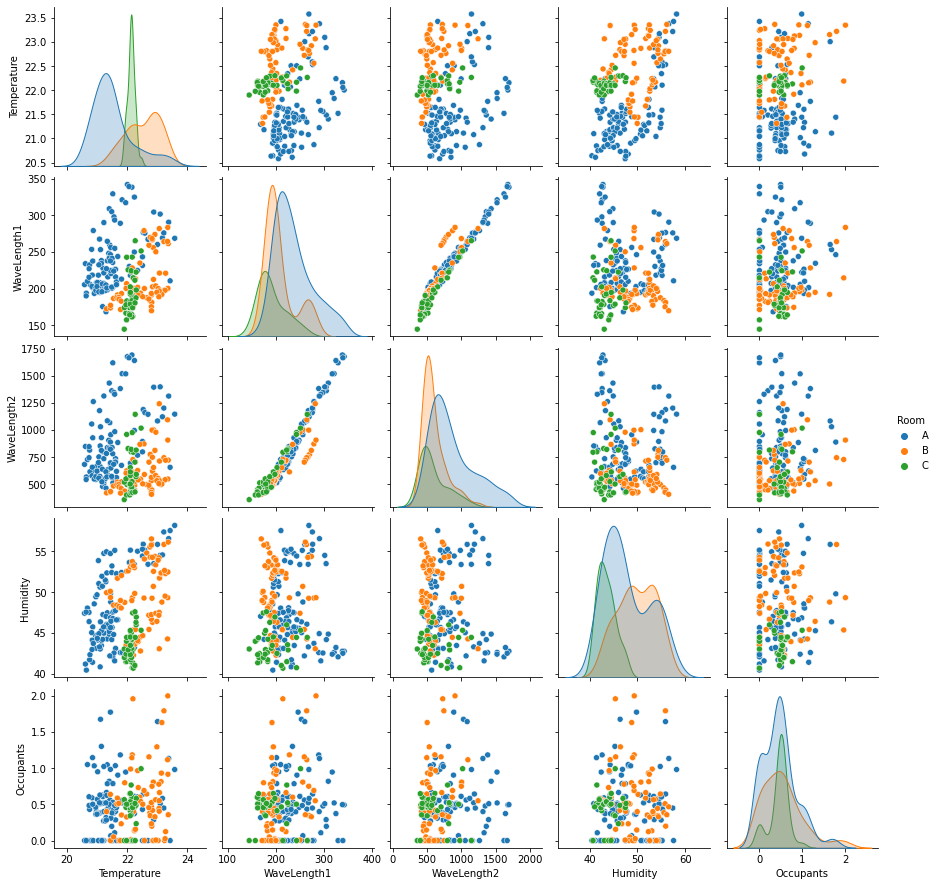

In [229]:
sns.pairplot(dfNew, hue='Room')

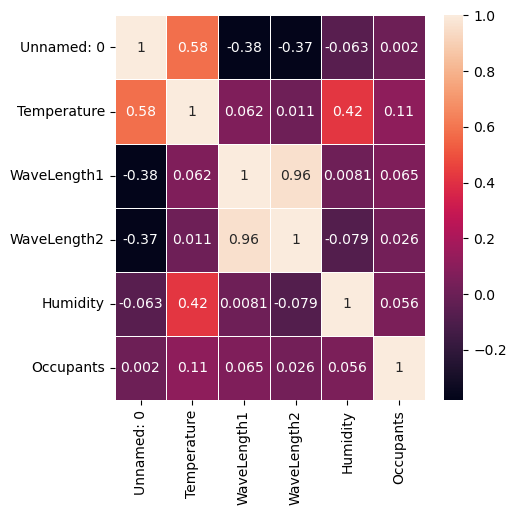

In [2]:
dfe = pd.read_csv('data/Room-climate-ABC-clean.csv', sep=',')

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dfe.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [68]:
df_clean.to_csv("data/Room-climate-ABC-clean.csv")